# Task 1

In [1]:
from math import sqrt, sin, pi
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt
from matplotlib import colormaps

/tmp/ipykernel_5011/1027373049.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


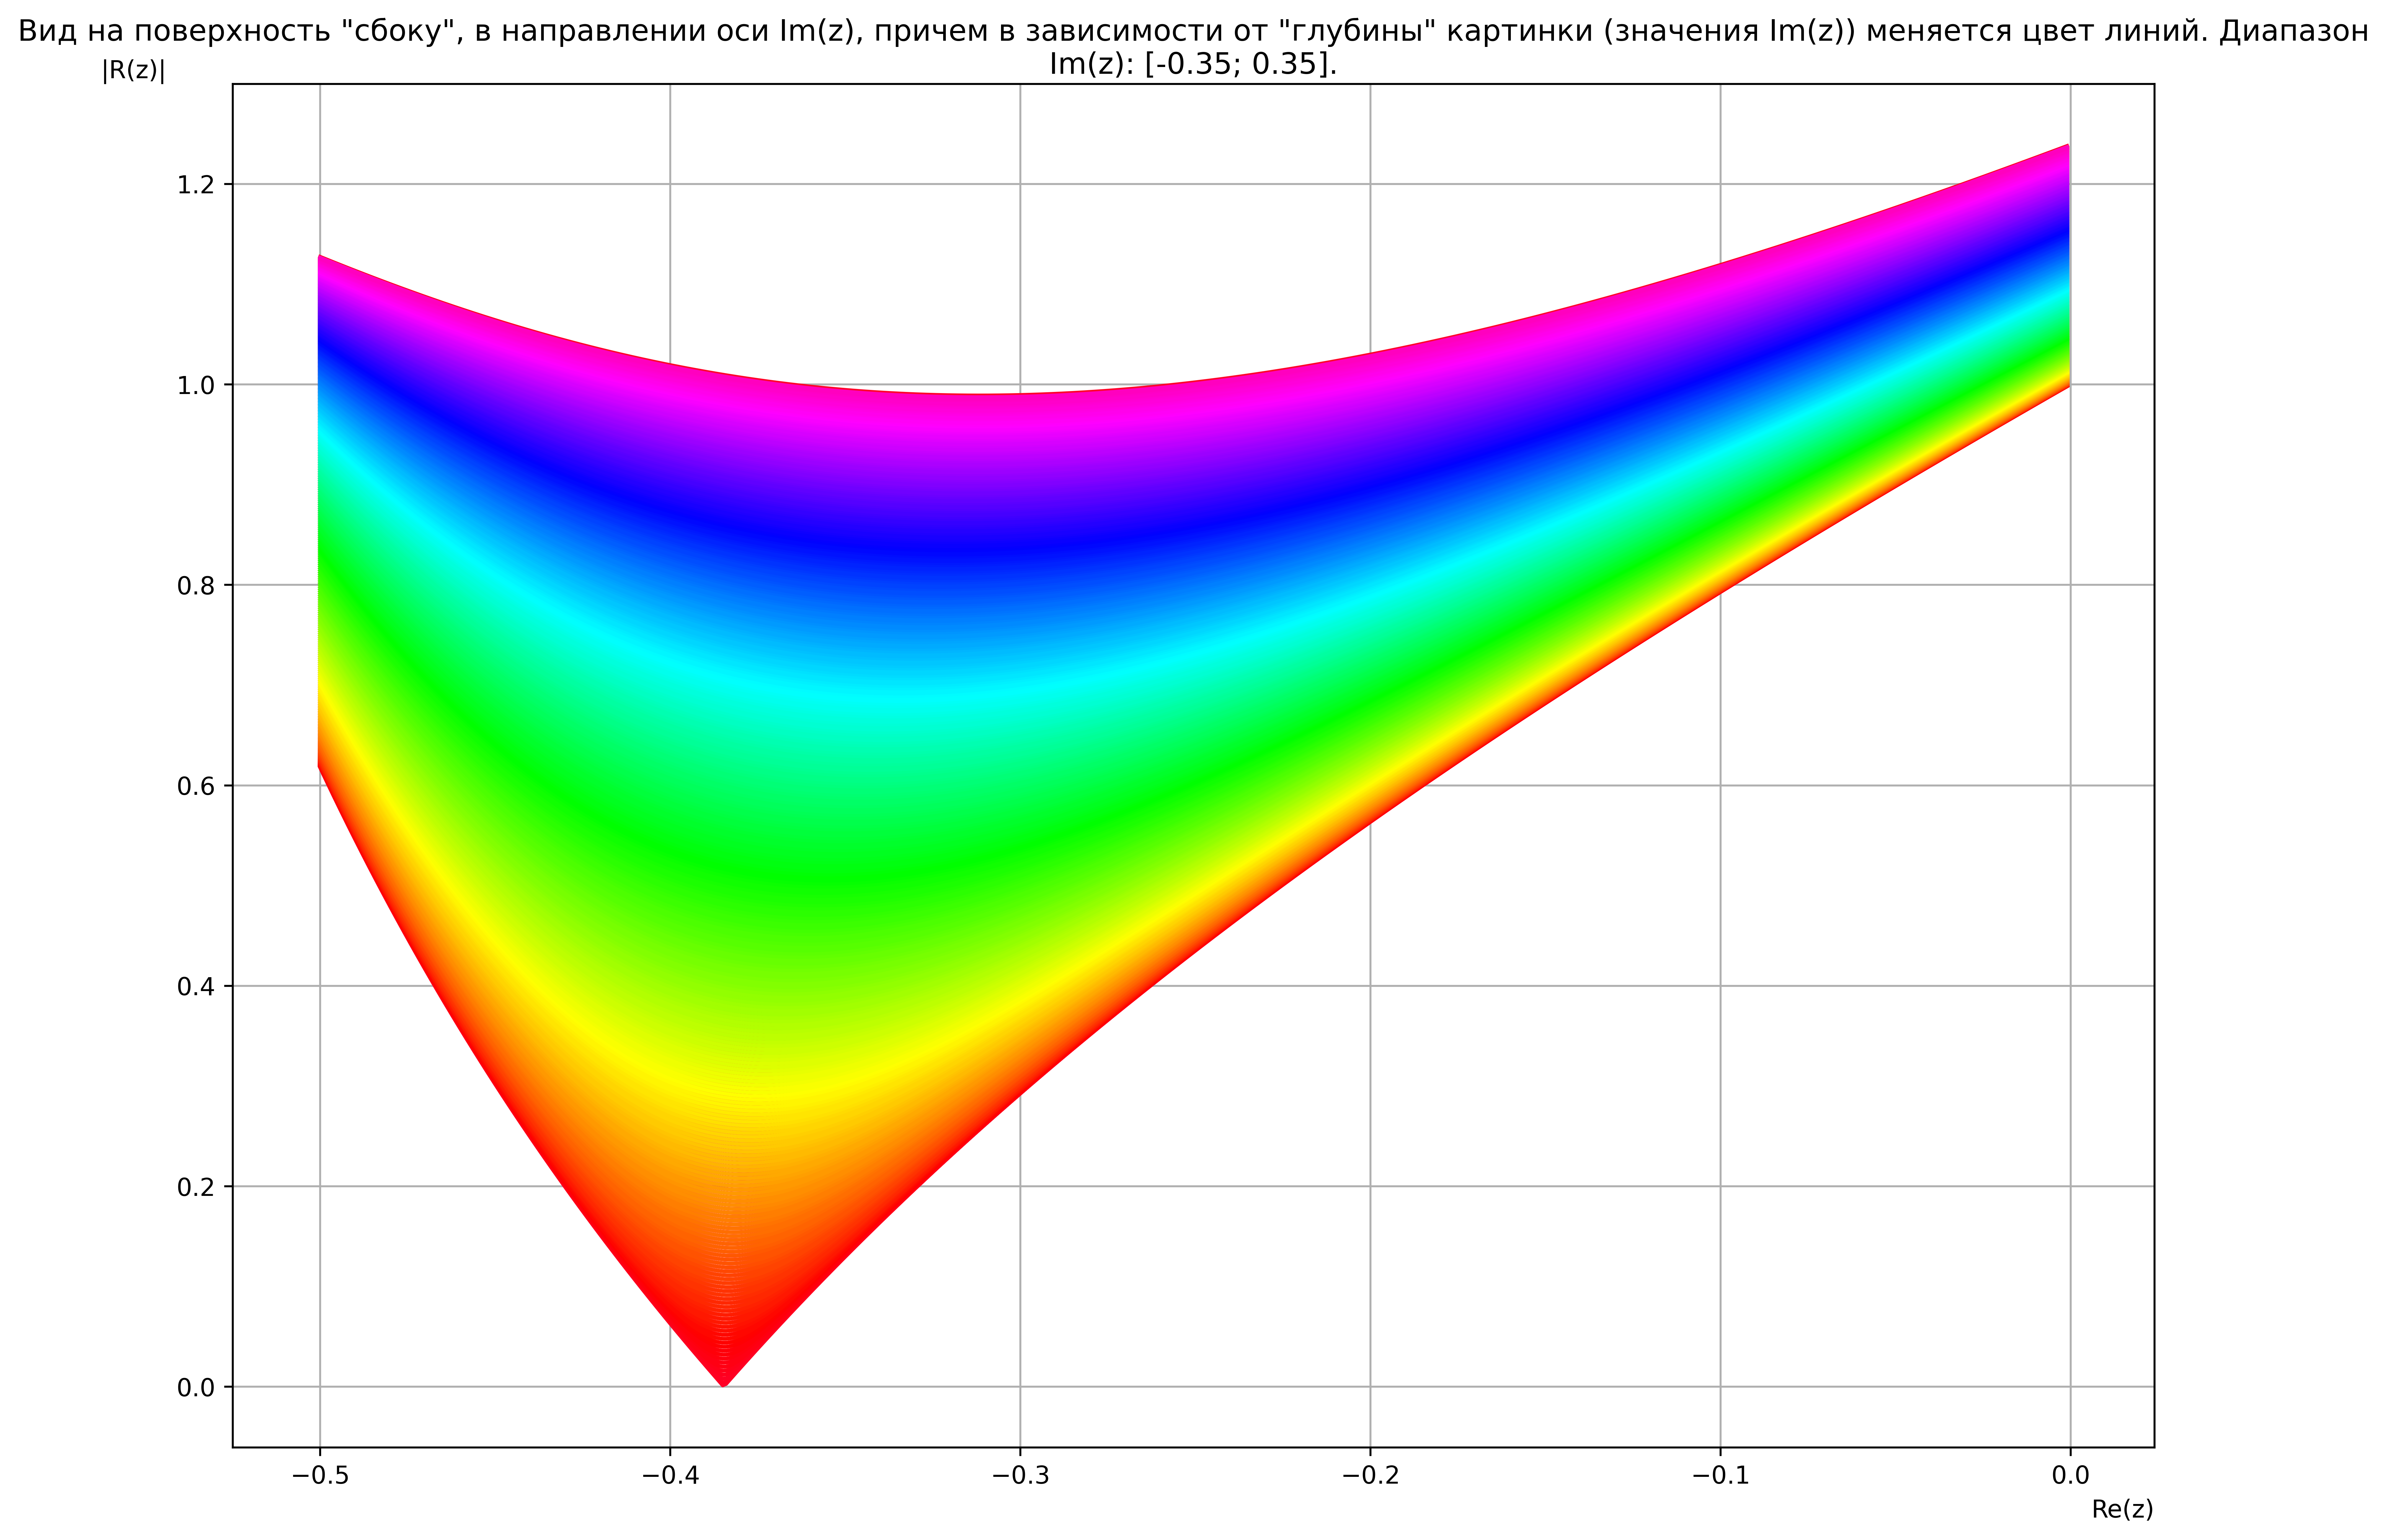

In [2]:
A = np.array([[0.5 - sqrt(3) / 6, 0                 ],
              [sqrt(3) / 3      , -0.5 - sqrt(3) / 2]])

b = np.array([1 + sqrt(3) / 6, -1.0 * sqrt(3) / 6])

def R(z: complex) -> complex:
        return det(np.eye(2) - (z * A) + ((z * np.ones(2)) @ b)) / det(np.eye(2) - (z * A))

real_lbound = -0.5
real_rbound = 0.0
real_step = 1e-3
imag_lbound = -0.35
imag_rbound = 0.35
imag_step = 1e-3

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.set_title('Вид на поверхность "сбоку", в направлении оси Im(z), причем в зависимости от "глубины" картинки (значения Im(z)) меняется цвет линий. Диапазон Im(z): [-0.35; 0.35].', wrap=True)
ax.set_xlabel('Re(z)', loc='right')
ax.set_ylabel('|R(z)|', loc='top', rotation='horizontal')
ax.grid()
fig.set_dpi(600)

x_line = np.arange(real_lbound, real_rbound, real_step)
im_array = np.arange(imag_lbound, imag_rbound, imag_step)
colmap = colormaps['gist_rainbow']
im_spectre = [colmap(colcode) for colcode in np.linspace(-1, 1, im_array.shape[0])]
for im, col in zip(im_array, im_spectre):
        y_line = [abs(R(re + im * 1j)) for re in x_line]
        ax.plot(x_line, y_line, color=col, ls='-')

fig.show()

# По полученным графикам в файлах absRz[1, 2, 3].png отчетливо видно, что |R(z)|
# не ограничивается единицей при Re(z) <= 0, а значит метод точно не является
# А-устойчивым или L-устойчивым. Абсолютной устойчивости на всей комплексной
# плоскости тоже, конечно, не наблюдается, однако она имеет место в некоторой
# близкой по форме к овалу области в приблизительных рамках (Re(z) ∈ [-0.5, 0];
# Im(z) ∈ [-0.35; 0.35]).


# Task 2

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy. integrate import odeint

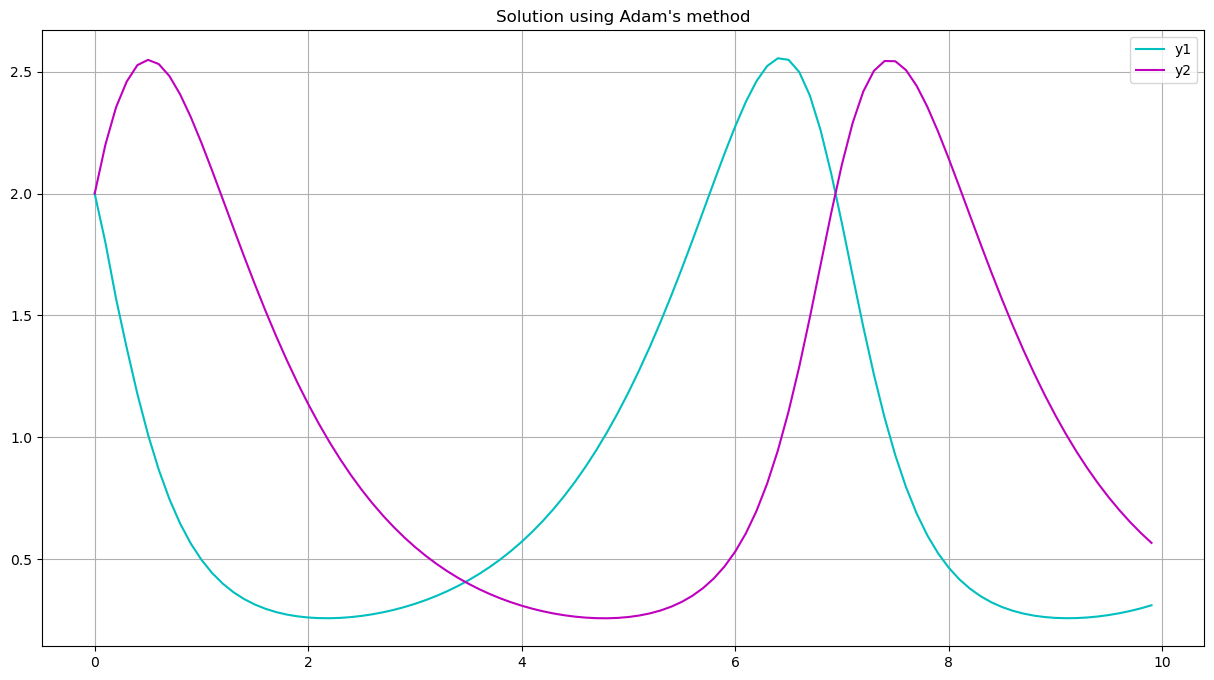

In [4]:
def getDerivative(U : list) -> list:
    y1 = U[1]
    y2 = U[2]
    Deriv = np.array([1, y1 - y1 * y2, -y2 + y1 * y2])
    return Deriv

def getStartCoord() -> list:
    return np.array([0, 2, 2])
    
        
def calculateAdamsTrajectory(StartCoord : list, Start: float, Stop: float, DeltaT: float) -> list:
    Trajectory = []
    K0 = StartCoord
    K1 = StartCoord
    K2 = StartCoord
    NumPoints = int((Stop - Start) / DeltaT)
    for Point in range(NumPoints):
        f2 = getDerivative(K2)
        f1 = getDerivative(K1)
        f0 = getDerivative(K0)
        K3 = K2 + DeltaT * (23.0/12 * f2 - 16.0/12 * f1 + 5.0/12 * f0)
        Trajectory.append(K2)
        K0 = K1
        K1 = K2
        K2 = K3
    return Trajectory

    

plt.figure(figsize = (15, 8))
plt.title("Solution using Adam's method")

Start = 0
Stop = 10
DeltaT = 0.1

Args = np.arange(Start, Stop, DeltaT)
AdamsVals = calculateAdamsTrajectory(getStartCoord(), Start, Stop, DeltaT)
Y1 = []
Y2 = []
for Val in AdamsVals:
    Y1.append(Val[1])
    Y2.append(Val[2])
plt.plot(Args, Y1, 'c', label = "у1")
plt.plot(Args, Y2, 'm', label = "у2")

plt.legend()
plt.grid()
plt.show()

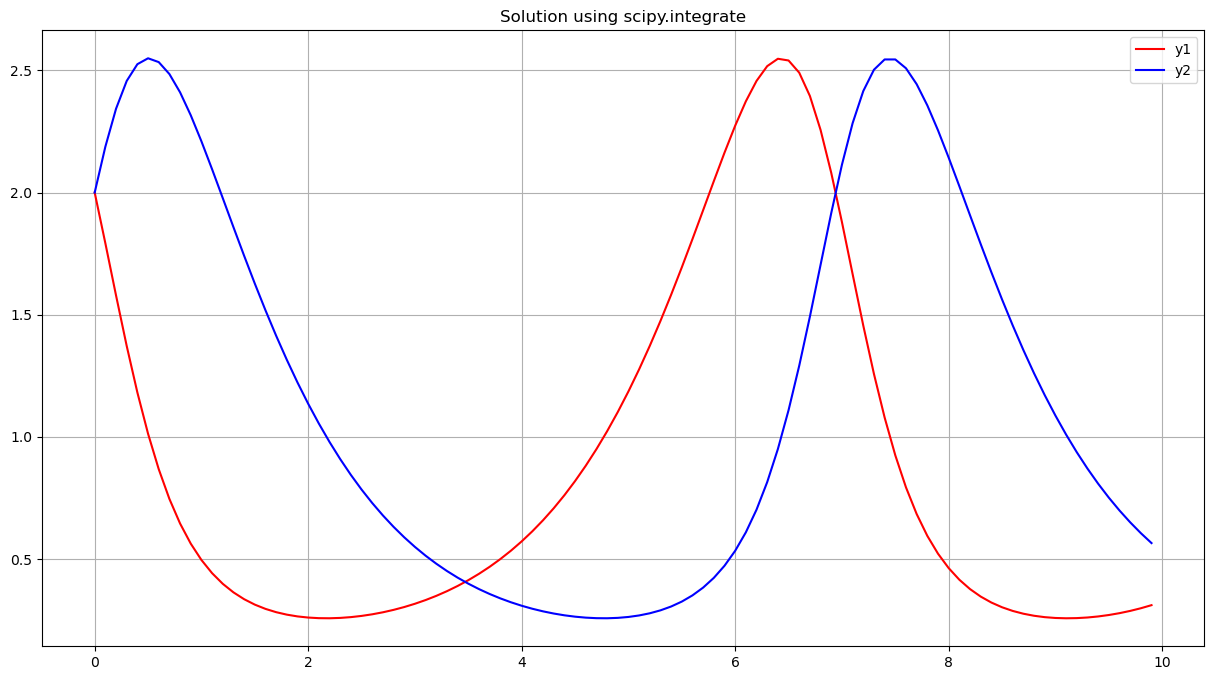

In [5]:
def Func(y : list, t : float)  -> list:
    y1, y2 = y
    return [y1 - y1 * y2, - y2 + y1 * y2]

plt.figure(figsize = (15, 8))
plt.title("Solution using scipy.integrate")

Start = 0
Stop = 10
DeltaT = 0.1

Args = np.arange(Start, Stop, DeltaT)
y0 = [2, 2]
w = odeint(Func, y0, Args)
y1 = w[:,0]
y2 = w[:,1]

plt.plot(Args, y1, 'r', label = "у1")
plt.plot(Args, y2, 'b', label = "у2")

plt.legend()
plt.grid()
plt.show()